In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# import data pkl file
df = pd.read_pickle('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/toy_dataset.pkl')

## 1.
Se busca ajustar un modelo de regresión polinómico $\hat{y}(x,\bold{w})$ de grado $M$:

$$
\hat{y}(x,\bold{w}) = \sum_{j=0}^M w_j \phi _j(x)
$$
donde $M$ es el grado máximo del polinomio y $\phi _j(x) = x^j$. Por lo que:

$$
\hat{y}(x,\bold{w}) = \sum_{j=0}^M w_j x^j
$$

### (a) 
Derivar las ecuaciones para determinar los parámetros óptimos $\bold{w}^∗$ aplicando el principio de máxima verosimilitud, asumiendo que las muestras son independientes e identicamente distribuidas con un ruido Gaussiano $N(0,σ2)$. Demostrar que $\bold{w}^∗$ es el óptimo global, que maximiza globalmente la verosimilitud (probabilidad conjunta) de los datos de entrenamiento.

     target  input_feature
0  1.032609      -0.250920
1  1.133085       0.901429
2  1.654127       0.463988
3  1.293227       0.197317
4  2.150710      -0.687963


Text(0, 0.5, 'Target')

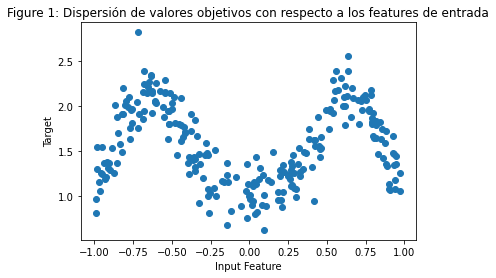

In [23]:
df.rename(columns={'taret': 'target'}, inplace=True)
print(df.head())
plt.scatter(df['input_feature'], df['target'])
plt.title('Figure 1: Dispersión de valores objetivos con respecto a los features de entrada')
plt.xlabel('Input Feature')
plt.ylabel('Target')


En el caso dado tenemos que:
$$
y_j = \hat{y}(x_j, \bold{w})+e_N
$$

Donde $\hat{y}$ corresponde al modelo de regresión y $e_N$ es el error (o ruido) de distribución gaussiana.

Considerando esto, la función de verosimilitud es de la siguiente manera:
$$
L(\boldsymbol{w}) = \prod_{j=1}^{M} p(y_j | x_j, \boldsymbol{w}) = \prod_{j=1}^{M} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2}} 
$$

Para calcular el $\boldsymbol{w}^*$ tomo el logaritmo natural de la verosimilitud para simplificar el cálculo.
$$
\ln \ L(\boldsymbol{w}) = \sum_{j=1}^{M} \ln ( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2}}) = \sum_{j=1}^{M} ( -\frac{1}{2} \ln(2\pi\sigma^2) -\frac{(y_j - \hat{y}(x_j, \boldsymbol{w}))^2}{2\sigma^2} ) \\
= -\frac{M}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{M} (y_j - \hat{y}(x_j, \boldsymbol{w}))^2
$$




El siguiente paso es encontrar $\bold{w}^*$, que equivale a los $\bold{w}$ que maximizan la verosimilitud. Una forma de hacer esto es minimizando el error cuadrático medio, $MSE$ que se define de esta manera:

$$
MSE(w) = \frac{1}{M} \sum_{j=1}^M (y_j-\hat{y}(x_j,\bold{w}))^2
$$

Entonces para minimizar el $MSE$ vamos a derivar e igualar a cero la expresión dada:

$$
\frac{\partial MSE(\bold{w})}{\partial \bold{w}} = \frac{2}{M} \sum_{j=1}^{M} (y_j - \hat{y}(x_j, \bold{w}))(-\bold{\phi}(x_j))=0
$$

Simplificando resulta:
$$
\bold{w}^*=(\Phi^T \cdot \Phi)^-1 \Phi^Ty
$$

Donde $\Phi$ es una matriz compuesta por las características polinómicas de las muestras del training (empezando por 1 y terminando con el grado $M$)

### b) 
Seleccionar el valor de $M$ más adecuado, entrenando modelos con distintos valores de M y evaluando el error de validación (o validación cruzada, si quisieran). Justificar su decisión mostrando curvas de error de entrenamiento y validación.

In [45]:
# creo funciones para implementar la regresión lineal

def train_test_split(df, test_size=0.2, seed=42):
    # shuffle dataset con una semilla fija
    df = df.sample(frac=1, random_state=seed).reset_index(drop=True)     
    train_size = int(df.shape[0] * (1 - test_size))
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]
    return train_df, test_df

def fit_linear_regression(X, y, M):
    X = np.c_[np.ones(X.shape[0]), X]
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    return W

# COPIADA DE LA CLASE DE REGRESIÓN LINEAL               !!!!!!!!!!!!!!!!!!!!!!!!!!!
def get_best_coef(X, Y, M):
    """
    Find the best weigths for X and Y
    """
    A = np.zeros((M, M)) # matriz de coeficientes
    S = np.zeros(2*M)
    b = np.zeros(M) # vector de resultados
    for i in range(len(X)):
        aux = Y[i]
        for j in range(M):
            b[j] = b[j]+aux
            aux = aux*X[i]
        aux = 1.0
        for j in range(2*M):
            S[j] = S[j]+aux
            aux = aux*X[i]
    for i in range(M):
        for j in range(M):
            A[i,j] = S[i+j]
            
    w = np.linalg.solve(A, b)
    assert np.allclose(np.dot(A, w), b)
    return w

     target  input_feature
0  0.997641      -0.005503
1  1.534830      -0.883833
2  0.674107      -0.144918
3  1.510050      -0.222645
4  1.425756       0.859395 

        target  input_feature
200  2.316024       0.589623
201  1.451435      -0.286493
202  1.221002       0.195800
203  1.749895       0.511102
204  1.173132       0.939169
[ 1.57794626 -0.01053652]


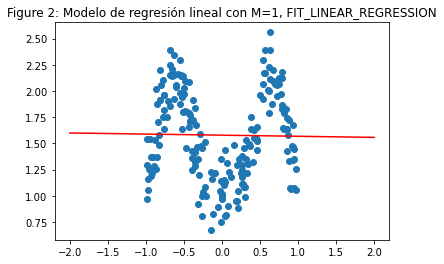

[ 1.57794626 -0.01053652]


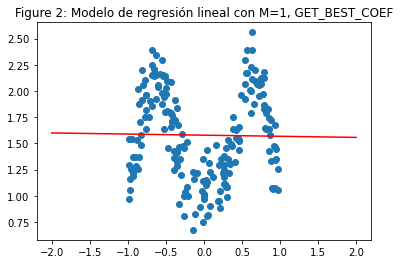

[ 1.45050585 -0.00440008  0.3530773 ]


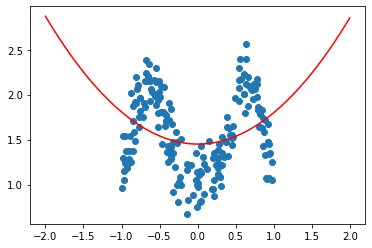

In [58]:
# pruebas sobre el dataset

# separo el dataset en train y test
train_df, test_df = train_test_split(df)
print(train_df.head(5), 2*'\n', test_df.head(5))

# M=1
# entreno el modelo
W1 = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, 1)
print(W1)

# grafico el modelo y los datos
plt.scatter(train_df['input_feature'], train_df['target'])
x = np.linspace(-2, 2, 100)
y = W1[0] + W1[1]*x
plt.plot(x, y, color='red')
plt.title('Figure 2: Modelo de regresión lineal con M=1, FIT_LINEAR_REGRESSION')
plt.show()

# ahora con get_best_coef
W1 = get_best_coef(train_df['input_feature'].values, train_df['target'].values, 2)
print(W1)

# grafico el modelo y los datos
plt.scatter(train_df['input_feature'], train_df['target'])
x = np.linspace(-2, 2, 100)
y = W1[0] + W1[1]*x
plt.plot(x, y, color='red')
plt.title('Figure 2: Modelo de regresión lineal con M=1, GET_BEST_COEF')
plt.show()





# # M=2
# # entreno el modelo con fit_linear_regression
# W2 = fit_linear_regression(train_df['input_feature'].values, train_df['target'].values, 2)
# print(W2)

# # grafico el modelo y los datos
# plt.scatter(train_df['input_feature'], train_df['target'])
# x = np.linspace(-2, 2, 100)
# y = W2[0] + W2[1]*x + W2[2]*x**2
# plt.plot(x, y, color='red')
# plt.show()

# ahora con get_best_coef
W2 = get_best_coef(train_df['input_feature'].values, train_df['target'].values, 3)
print(W2)

# grafico el modelo y los datos
plt.scatter(train_df['input_feature'], train_df['target'])
x = np.linspace(-2, 2, 100)
y = W2[0] + W2[1]*x + W2[2]*x**2
plt.plot(x, y, color='red')
plt.show()